<a href="https://colab.research.google.com/github/wal-03/Final-Project-Data-Mining/blob/main/Final_Project_Data_Mining_Grup_J.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisis Sentimen Kenaikan UMP 6.5%** - **Final Project Data Mining 2024**

# Kelompok J

| NIM | Nama |
| -------- | -------- |
|11220940000006   | Ahmad Izza	   |
|11220940000032   |     Aisya Shalifa     |
|11220940000046   | Putri Maesarah |
|11220940000064   |    Fadhilah Awal Rizqiansyah   |

# Data Understanding

Upah Minimum Provinsi (UMP) merupakan salah satu kebijakan penting yang langsung memengaruhi kehidupan pekerja dan pemberi kerja. Pada tahun ini, pemerintah mengumumkan kenaikan UMP sebesar 6.5%, yang menjadi topik hangat di berbagai platform media, termasuk YouTube. Keputusan ini menuai beragam tanggapan dari masyarakat, mulai dari dukungan hingga kritik.

**Asal Data:** Komentar dari 50 video YouTube yang relevan dengan tema kenaikan UMP 6.5%. Video yang dipilih mencakup berita resmi, diskusi publik, opini ekonom, serta konten kreator yang membahas topik tersebut.

# Prepocessing Data Text

## Import Modul

In [1]:
!pip install sastrawi
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('popular')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

## Data Load

In [2]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/wal-03/Final-Project-Data-Mining/refs/heads/main/Data%20Slang%20%26%20Typo.txt # Data Slang & Typo
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/stopwords_id.txt # Data stopwords

--2024-12-22 14:39:09--  https://raw.githubusercontent.com/wal-03/Final-Project-Data-Mining/refs/heads/main/Data%20Slang%20%26%20Typo.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76328 (75K) [text/plain]
Saving to: ‘data/Data Slang & Typo.txt’

Data Slang & Typo.t 100%[===================>]  74.54K  --.-KB/s    in 0.02s   

2024-12-22 14:39:09 (3.38 MB/s) - ‘data/Data Slang & Typo.txt’ saved [76328/76328]

--2024-12-22 14:39:09--  https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.


In [3]:
url = 'https://raw.githubusercontent.com/wal-03/Final-Project-Data-Mining/refs/heads/main/YouTube_comment.csv'
dataRaw = pd.read_csv(url, low_memory=False, encoding='utf8')
dataRaw.columns = ['text']
dataRaw

,text
0,Saya jadi satpam di perumahan panjibuwono city...
1,Merdeka kalau naik semua gajih di setiap perus...
2,"Ahhhh,,, janji hanyalah janji kampanye"
3,Pak crening service naikkan lah pak
4,"UPAH MINIMUM PENSIUNAN BUMN JUGA DONK,.PAK .. ..."
...,...
1512,"Macan Asia ni bos, indonesia sejahtera"
1513,Mkn10 rbu mana cukup
1514,"Selesaikn dlu kasus korupsi, bru pikirkan kena..."
1515,naik dikit


## Data Duplication

In [4]:
dataRaw.duplicated().sum()

30

In [5]:
dataRaw.drop_duplicates(inplace=True) # Menghapus duplikasi data

In [6]:
print(dataRaw.shape)

(1487, 1)


## Adding Labels to the Dataset

Labeling dilakukan secara manual dan ditambahkan pada tahap awal proses preprocessing data. Hal ini dilakukan untuk memastikan bahwa analisis sentimen didasarkan pada data asli sebelum dilakukan modifikasi seperti pembersihan teks, normalisasi slang, penghapusan stopwords, atau stemming. Dengan cara ini, sentimen asli dari komentar tetap terjaga dan tidak terpengaruh oleh proses preprocessing yang mungkin mengubah konteks atau makna dari teks.

1.0 = Negative <br>
2.0 = Neutral <br>
3.0 = Positive

In [7]:
url2 = 'https://raw.githubusercontent.com/wal-03/Final-Project-Data-Mining/refs/heads/main/data_cleaned_labeling.csv'
data = pd.read_csv(url2, low_memory=False, encoding='utf8')
data.rename(columns={'labeling': 'label'}, inplace=True)
data

,text,label
0,Saya jadi satpam di perumahan panjibuwono city...,1.0
1,Merdeka kalau naik semua gajih di setiap perus...,3.0
2,"Ahhhh,,, janji hanyalah janji kampanye",2.0
3,Pak crening service naikkan lah pak,2.0
4,"UPAH MINIMUM PENSIUNAN BUMN JUGA DONK,.PAK .. ...",1.0
...,...,...
1482,"Macan Asia ni bos, indonesia sejahtera",3.0
1483,Mkn10 rbu mana cukup,1.0
1484,"Selesaikn dlu kasus korupsi, bru pikirkan kena...",1.0
1485,naik dikit,1.0


## Changing the Data Type of the Label

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    1487 non-null   object 
 1   label   1486 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.4+ KB


In [9]:
data['label'] = data['label'].astype('category')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   text    1487 non-null   object  
 1   label   1486 non-null   category
dtypes: category(1), object(1)
memory usage: 13.3+ KB


## Missing Values

In [11]:
data.isnull().sum() # Terdapat 1 data yang terlewat pada tahap labelling

,0
text,0
label,1


In [12]:
null_rows = data[data['label'].isnull()]
null_rows

,text,label
1242,Kenapa kalau nakes gak mendapat tinjangan apa ...,NaN


In [13]:
data['label'] = data['label'].fillna(2.0) # Mengisi nilai null

## Cleaning Data

Pada tahap cleaning, teks melalui proses pembersihan untuk menghapus elemen-elemen yang tidak relevan. Proses ini mencakup pengubahan semua huruf menjadi huruf kecil, penghapusan URL, mention (@username), angka, karakter khusus, serta spasi berlebih.

In [14]:
# Function for cleaning text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, numbers, etc.
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespaces
    return text

In [15]:
data['cleaned_text'] = data['text'].apply(clean_text)

In [16]:
data.head()

,text,label,cleaned_text
0,Saya jadi satpam di perumahan panjibuwono city...,1.0,saya jadi satpam di perumahan panjibuwono city...
1,Merdeka kalau naik semua gajih di setiap perus...,3.0,merdeka kalau naik semua gajih di setiap perus...
2,"Ahhhh,,, janji hanyalah janji kampanye",2.0,ahhhh janji hanyalah janji kampanye
3,Pak crening service naikkan lah pak,2.0,pak crening service naikkan lah pak
4,"UPAH MINIMUM PENSIUNAN BUMN JUGA DONK,.PAK .. ...",1.0,upah minimum pensiunan bumn juga donkpak masa ...


## Data Normalized

Pada tahap normalisasi, teks yang sudah dibersihkan diperbaiki dengan mengganti kata-kata slang atau typo menjadi kata-kata baku sesuai dengan kamus yang telah kami buat.

In [17]:
# File slang
slang_file = 'data/Data Slang & Typo.txt'

# Membuat kamus slang dari file
slang_dict = {}
with open(slang_file, 'r', encoding='utf-8') as file:
    for line in file:
        if ':' in line:  # Memastikan format sesuai
            slang, standard = line.strip().split(':', 1)  # Split berdasarkan ':' sekali
            slang_dict[slang.strip()] = standard.strip()

# Fungsi untuk mengganti slang dengan kata baku
def normalize_slang(text):
    words = word_tokenize(text.lower())  # Tokenisasi teks
    return ' '.join([slang_dict.get(word, word) for word in words])

# Terapkan normalisasi slang ke kolom 'cleaned_text'
data['normalized_comment'] = data['cleaned_text'].apply(normalize_slang)

# Tampilkan hasil
data

,text,label,cleaned_text,normalized_comment
0,Saya jadi satpam di perumahan panjibuwono city...,1.0,saya jadi satpam di perumahan panjibuwono city...,saya jadi satuan pengamanan di perumahan panji...
1,Merdeka kalau naik semua gajih di setiap perus...,3.0,merdeka kalau naik semua gajih di setiap perus...,merdeka kalau naik semua gaji di setiap perusa...
2,"Ahhhh,,, janji hanyalah janji kampanye",2.0,ahhhh janji hanyalah janji kampanye,ah janji hanyalah janji kampanye
3,Pak crening service naikkan lah pak,2.0,pak crening service naikkan lah pak,bapak cleaning service naikkan lah bapak
4,"UPAH MINIMUM PENSIUNAN BUMN JUGA DONK,.PAK .. ...",1.0,upah minimum pensiunan bumn juga donkpak masa ...,upah minimum pensiunan bumn juga dong pak masa...
...,...,...,...,...
1482,"Macan Asia ni bos, indonesia sejahtera",3.0,macan asia ni bos indonesia sejahtera,macan asia ini bos indonesia sejahtera
1483,Mkn10 rbu mana cukup,1.0,mkn rbu mana cukup,makin ribu mana cukup
1484,"Selesaikn dlu kasus korupsi, bru pikirkan kena...",1.0,selesaikn dlu kasus korupsi bru pikirkan kenai...,selesaikan dulu kasus korupsi baru pikirkan ke...
1485,naik dikit,1.0,naik dikit,naik dikit


## Cleaning Data 2

Setelah normalisasi, ternyata masih ditemukan tanda baca, jadi kami lakukan cleaning data kembali

In [18]:
data['cleaned_text2'] = data['normalized_comment'].apply(clean_text)
data

,text,label,cleaned_text,normalized_comment,cleaned_text2
0,Saya jadi satpam di perumahan panjibuwono city...,1.0,saya jadi satpam di perumahan panjibuwono city...,saya jadi satuan pengamanan di perumahan panji...,saya jadi satuan pengamanan di perumahan panji...
1,Merdeka kalau naik semua gajih di setiap perus...,3.0,merdeka kalau naik semua gajih di setiap perus...,merdeka kalau naik semua gaji di setiap perusa...,merdeka kalau naik semua gaji di setiap perusa...
2,"Ahhhh,,, janji hanyalah janji kampanye",2.0,ahhhh janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji hanyalah janji kampanye
3,Pak crening service naikkan lah pak,2.0,pak crening service naikkan lah pak,bapak cleaning service naikkan lah bapak,bapak cleaning service naikkan lah bapak
4,"UPAH MINIMUM PENSIUNAN BUMN JUGA DONK,.PAK .. ...",1.0,upah minimum pensiunan bumn juga donkpak masa ...,upah minimum pensiunan bumn juga dong pak masa...,upah minimum pensiunan bumn juga dong pak masa...
...,...,...,...,...,...
1482,"Macan Asia ni bos, indonesia sejahtera",3.0,macan asia ni bos indonesia sejahtera,macan asia ini bos indonesia sejahtera,macan asia ini bos indonesia sejahtera
1483,Mkn10 rbu mana cukup,1.0,mkn rbu mana cukup,makin ribu mana cukup,makin ribu mana cukup
1484,"Selesaikn dlu kasus korupsi, bru pikirkan kena...",1.0,selesaikn dlu kasus korupsi bru pikirkan kenai...,selesaikan dulu kasus korupsi baru pikirkan ke...,selesaikan dulu kasus korupsi baru pikirkan ke...
1485,naik dikit,1.0,naik dikit,naik dikit,naik dikit


## Stopwords

Pada langkah penghapusan stopword, kata-kata umum yang tidak memiliki makna signifikan, seperti konjungsi, preposisi, dan kata pengisi lainnya, dihapus dari teks.

In [19]:
# Membaca file stopwords
with open('data/stopwords_id.txt', "r", encoding="utf-8", errors='replace') as file:
    id_stop = file.readlines()

# Bersihkan stopwords (hapus spasi dan ubah ke huruf kecil)
id_stop = [word.strip().lower() for word in id_stop]

# Tambahkan stopwords tambahan
additional_stopwords = {'nya', 'iya', 'itu', 'kah', 'dan', 'ke', 'di',
                        'turun', 'naik', 'ambil', 'lihat', 'alhamdulillah',
                        'syukur', 'tolong', 'atas', 'pokok', 'hari', 'ump', 'naik', 'naikin',
                        'presiden', 'indonesia', 'naik', 'sih', 'pakai', 'presiden prabowo',
                        'biar', 'bodoh', 'juta', 'ribu'}
id_stop.extend(additional_stopwords)  # Gabungkan stopwords tambahan

# Fungsi untuk menghapus stopwords
def remove_custom_stopwords(text):
    words = word_tokenize(text)  # Tokenisasi teks
    return ' '.join([word for word in words if word not in id_stop])

# Terapkan penghapusan stopwords ke kolom 'normalized_comment2'
data['no_stopwords'] = data['cleaned_text2'].apply(remove_custom_stopwords)

data

,text,label,cleaned_text,normalized_comment,cleaned_text2,no_stopwords
0,Saya jadi satpam di perumahan panjibuwono city...,1.0,saya jadi satpam di perumahan panjibuwono city...,saya jadi satuan pengamanan di perumahan panji...,saya jadi satuan pengamanan di perumahan panji...,satuan pengamanan perumahan panjibuwono city c...
1,Merdeka kalau naik semua gajih di setiap perus...,3.0,merdeka kalau naik semua gajih di setiap perus...,merdeka kalau naik semua gaji di setiap perusa...,merdeka kalau naik semua gaji di setiap perusa...,merdeka gaji perusahaan amin allah
2,"Ahhhh,,, janji hanyalah janji kampanye",2.0,ahhhh janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji janji kampanye
3,Pak crening service naikkan lah pak,2.0,pak crening service naikkan lah pak,bapak cleaning service naikkan lah bapak,bapak cleaning service naikkan lah bapak,cleaning service naikkan
4,"UPAH MINIMUM PENSIUNAN BUMN JUGA DONK,.PAK .. ...",1.0,upah minimum pensiunan bumn juga donkpak masa ...,upah minimum pensiunan bumn juga dong pak masa...,upah minimum pensiunan bumn juga dong pak masa...,upah minimum pensiunan bumn perusahaan eks bum...
...,...,...,...,...,...,...
1482,"Macan Asia ni bos, indonesia sejahtera",3.0,macan asia ni bos indonesia sejahtera,macan asia ini bos indonesia sejahtera,macan asia ini bos indonesia sejahtera,macan asia bos sejahtera
1483,Mkn10 rbu mana cukup,1.0,mkn rbu mana cukup,makin ribu mana cukup,makin ribu mana cukup,
1484,"Selesaikn dlu kasus korupsi, bru pikirkan kena...",1.0,selesaikn dlu kasus korupsi bru pikirkan kenai...,selesaikan dulu kasus korupsi baru pikirkan ke...,selesaikan dulu kasus korupsi baru pikirkan ke...,selesaikan korupsi pikirkan kenaikan upah ujun...
1485,naik dikit,1.0,naik dikit,naik dikit,naik dikit,dikit


## Data lemmatization

Pada langkah lemmatization data, kata-kata diubah menjadi bentuk dasarnya atau kata dasarnya.

In [20]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [21]:
# Fungsi stemming menggunakan Sastrawi
def stem_text(text):
    return stemmer.stem(text)

# Terapkan stemming pada kolom 'no_stopwords'
data['stemmed_text'] = data['no_stopwords'].apply(stem_text)

In [22]:
data

,text,label,cleaned_text,normalized_comment,cleaned_text2,no_stopwords,stemmed_text
0,Saya jadi satpam di perumahan panjibuwono city...,1.0,saya jadi satpam di perumahan panjibuwono city...,saya jadi satuan pengamanan di perumahan panji...,saya jadi satuan pengamanan di perumahan panji...,satuan pengamanan perumahan panjibuwono city c...,satu aman rumah panjibuwono city cluster malio...
1,Merdeka kalau naik semua gajih di setiap perus...,3.0,merdeka kalau naik semua gajih di setiap perus...,merdeka kalau naik semua gaji di setiap perusa...,merdeka kalau naik semua gaji di setiap perusa...,merdeka gaji perusahaan amin allah,merdeka gaji usaha amin allah
2,"Ahhhh,,, janji hanyalah janji kampanye",2.0,ahhhh janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji janji kampanye,ah janji janji kampanye
3,Pak crening service naikkan lah pak,2.0,pak crening service naikkan lah pak,bapak cleaning service naikkan lah bapak,bapak cleaning service naikkan lah bapak,cleaning service naikkan,cleaning service naik
4,"UPAH MINIMUM PENSIUNAN BUMN JUGA DONK,.PAK .. ...",1.0,upah minimum pensiunan bumn juga donkpak masa ...,upah minimum pensiunan bumn juga dong pak masa...,upah minimum pensiunan bumn juga dong pak masa...,upah minimum pensiunan bumn perusahaan eks bum...,upah minimum pensiun bumn usaha eks bumn pt an...
...,...,...,...,...,...,...,...
1482,"Macan Asia ni bos, indonesia sejahtera",3.0,macan asia ni bos indonesia sejahtera,macan asia ini bos indonesia sejahtera,macan asia ini bos indonesia sejahtera,macan asia bos sejahtera,macan asia bos sejahtera
1483,Mkn10 rbu mana cukup,1.0,mkn rbu mana cukup,makin ribu mana cukup,makin ribu mana cukup,,
1484,"Selesaikn dlu kasus korupsi, bru pikirkan kena...",1.0,selesaikn dlu kasus korupsi bru pikirkan kenai...,selesaikan dulu kasus korupsi baru pikirkan ke...,selesaikan dulu kasus korupsi baru pikirkan ke...,selesaikan korupsi pikirkan kenaikan upah ujun...,selesai korupsi pikir naik upah ujung korupsi
1485,naik dikit,1.0,naik dikit,naik dikit,naik dikit,dikit,dikit


## Final Cleaned Text

In [23]:
from nltk.tokenize import word_tokenize

# Fungsi untuk tokenisasi teks
def tokenize_text(text):
    return word_tokenize(text)  # Tokenisasi teks menjadi list kata

# Terapkan tokenisasi ke kolom 'stemmed_text'
data['final_cleaned_text'] = data['stemmed_text'].apply(tokenize_text)

data

,text,label,cleaned_text,normalized_comment,cleaned_text2,no_stopwords,stemmed_text,final_cleaned_text
0,Saya jadi satpam di perumahan panjibuwono city...,1.0,saya jadi satpam di perumahan panjibuwono city...,saya jadi satuan pengamanan di perumahan panji...,saya jadi satuan pengamanan di perumahan panji...,satuan pengamanan perumahan panjibuwono city c...,satu aman rumah panjibuwono city cluster malio...,"[satu, aman, rumah, panjibuwono, city, cluster..."
1,Merdeka kalau naik semua gajih di setiap perus...,3.0,merdeka kalau naik semua gajih di setiap perus...,merdeka kalau naik semua gaji di setiap perusa...,merdeka kalau naik semua gaji di setiap perusa...,merdeka gaji perusahaan amin allah,merdeka gaji usaha amin allah,"[merdeka, gaji, usaha, amin, allah]"
2,"Ahhhh,,, janji hanyalah janji kampanye",2.0,ahhhh janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji janji kampanye,ah janji janji kampanye,"[ah, janji, janji, kampanye]"
3,Pak crening service naikkan lah pak,2.0,pak crening service naikkan lah pak,bapak cleaning service naikkan lah bapak,bapak cleaning service naikkan lah bapak,cleaning service naikkan,cleaning service naik,"[cleaning, service, naik]"
4,"UPAH MINIMUM PENSIUNAN BUMN JUGA DONK,.PAK .. ...",1.0,upah minimum pensiunan bumn juga donkpak masa ...,upah minimum pensiunan bumn juga dong pak masa...,upah minimum pensiunan bumn juga dong pak masa...,upah minimum pensiunan bumn perusahaan eks bum...,upah minimum pensiun bumn usaha eks bumn pt an...,"[upah, minimum, pensiun, bumn, usaha, eks, bum..."
...,...,...,...,...,...,...,...,...
1482,"Macan Asia ni bos, indonesia sejahtera",3.0,macan asia ni bos indonesia sejahtera,macan asia ini bos indonesia sejahtera,macan asia ini bos indonesia sejahtera,macan asia bos sejahtera,macan asia bos sejahtera,"[macan, asia, bos, sejahtera]"
1483,Mkn10 rbu mana cukup,1.0,mkn rbu mana cukup,makin ribu mana cukup,makin ribu mana cukup,,,[]
1484,"Selesaikn dlu kasus korupsi, bru pikirkan kena...",1.0,selesaikn dlu kasus korupsi bru pikirkan kenai...,selesaikan dulu kasus korupsi baru pikirkan ke...,selesaikan dulu kasus korupsi baru pikirkan ke...,selesaikan korupsi pikirkan kenaikan upah ujun...,selesai korupsi pikir naik upah ujung korupsi,"[selesai, korupsi, pikir, naik, upah, ujung, k..."
1485,naik dikit,1.0,naik dikit,naik dikit,naik dikit,dikit,dikit,[dikit]


# EDA

## Distribusi pesebaran label

In [24]:
print(f"Input data has {len(data)} rows and {len(data.columns)} columns")
print(f"label 1.0 = {len(data[data['label']==1.0])} rows")
print(f"label 2.0 = {len(data[data['label']==2.0])} rows")
print(f"label 3.0 = {len(data[data['label']==3.0])} rows")

Input data has 1487 rows and 8 columns
label 1.0 = 861 rows
label 2.0 = 412 rows
label 3.0 = 214 rows


<ipython-input-25-a90828bc97c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='label', palette='viridis')


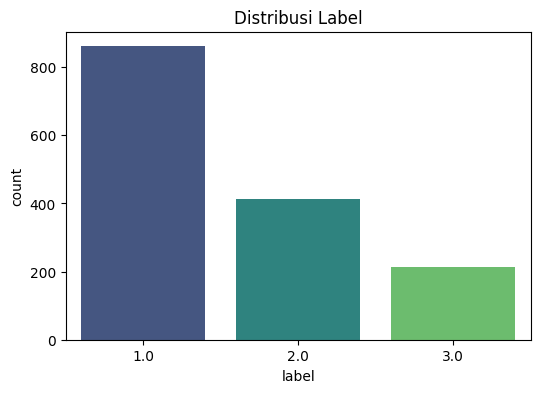

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi label
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='label', palette='viridis')
plt.title('Distribusi Label')
plt.show()

1. **Label 1.0** : Terdapat 861 data, yang mencakup 58% dari total data. Ini menunjukkan bahwa mayoritas data dalam dataset ini berisi sentimen negatif.
2. **Label 2.0** : Ada 412 data, yang menyumbang 28% dari total data. Ini menunjukkan bahwa sekitar sepertiga dari data mengandung sentimen netral.
3. **Label 3.0** : Dengan hanya 214 data, label ini mencakup 14% dari total data. Ini berarti sentimen positif jauh lebih sedikit dibandingkan sentimen negatif dan netral.

## Word Cloud

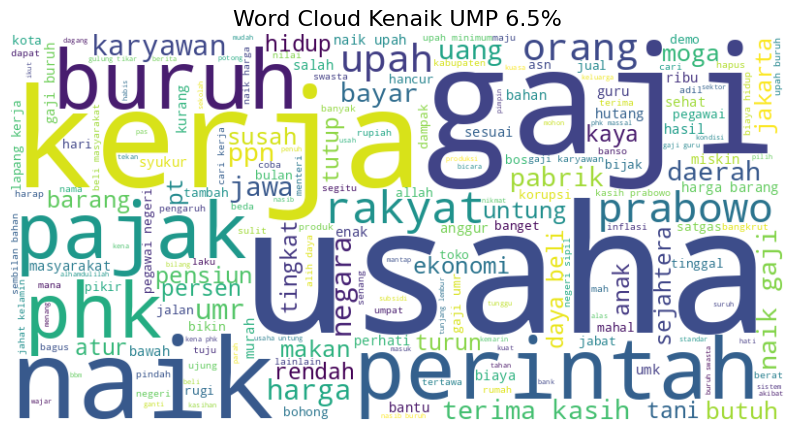

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([' '.join(tokens) for tokens in data['final_cleaned_text']])

# Buat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words)

# Tampilkan Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Kenaik UMP 6.5%", fontsize=16)
plt.show()


Hasil word cloud ini menunjukkan beragam reaksi masyarakat terkait kenaikan UMP 6.5%. Banyak yang merasa positif dengan harapan peningkatan gaji dan kondisi kerja, sementara di sisi lain, ada kekhawatiran terkait dampak pada usaha, potensi PHK, serta kenaikan harga dan pajak.

## Word Cloud for Negative Sentiment

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pisahkan data berdasarkan label 1.0, 2.0, dan 3.0
data_label_1 = data[data['label'] == 1.0]['final_cleaned_text']
data_label_2 = data[data['label'] == 2.0]['final_cleaned_text']
data_label_3 = data[data['label'] == 3.0]['final_cleaned_text']

# Gabungkan semua token menjadi satu teks untuk masing-masing label
all_words_label_1 = ' '.join([' '.join(tokens) for tokens in data_label_1])
all_words_label_2 = ' '.join([' '.join(tokens) for tokens in data_label_2])
all_words_label_3 = ' '.join([' '.join(tokens) for tokens in data_label_3])

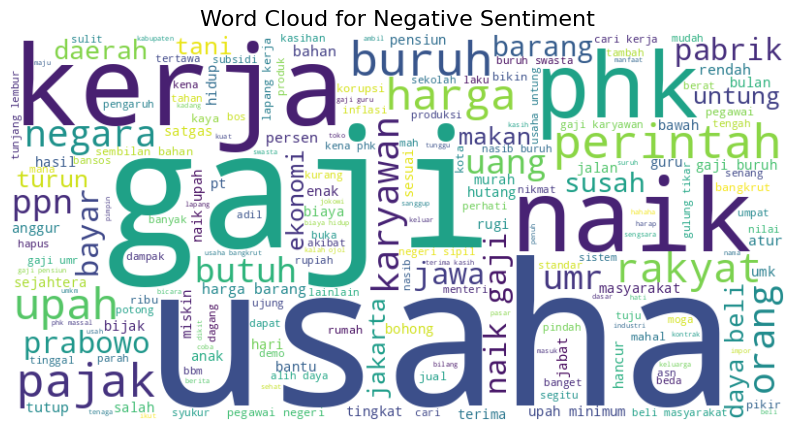

In [28]:
# Buat Word Cloud untuk label 1.0
wordcloud_1 = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words_label_1)
# Tampilkan Word Cloud untuk label 1.0
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Sentiment", fontsize=16)
plt.show()

Hasil word cloud ini menunjukkan kekhawatiran masyarakat tentang dampak negatif kenaikan UMP 6.5%. Mereka khawatir dengan biaya hidup yang semakin tinggi, potensi PHK, serta tekanan yang dihadapi oleh usaha kecil. Selain itu, ada juga kekhawatiran bahwa meskipun gaji naik, harga barang dan pajak bisa ikut meningkat, sehingga kesejahteraan pekerja tidak akan berubah banyak.

## Word Cloud for Netral Sentiment

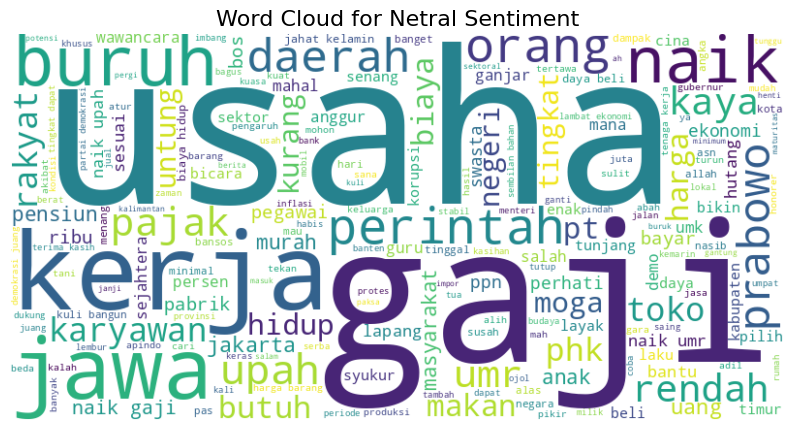

In [29]:
# Buat Word Cloud untuk label 2.0
wordcloud_2 = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words_label_2)
# Tampilkan Word Cloud untuk label 2.0
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Netral Sentiment", fontsize=16)
plt.show()

Hasil word cloud ini menunjukkan bahwa respon terhadap kenaikan UMP 6.5% sebagian besar netral. Masyarakat lebih banyak memperhatikan dampaknya terhadap dunia usaha, perubahan gaji, dan kondisi kerja tanpa merasa terlalu positif atau negatif. Kenaikan UMP dilihat sebagai fakta, dengan perhatian pada bagaimana hal itu bisa mempengaruhi pajak, biaya, dan dampaknya yang mungkin berbeda di setiap daerah.

## Word Cloud for Positive Sentiment

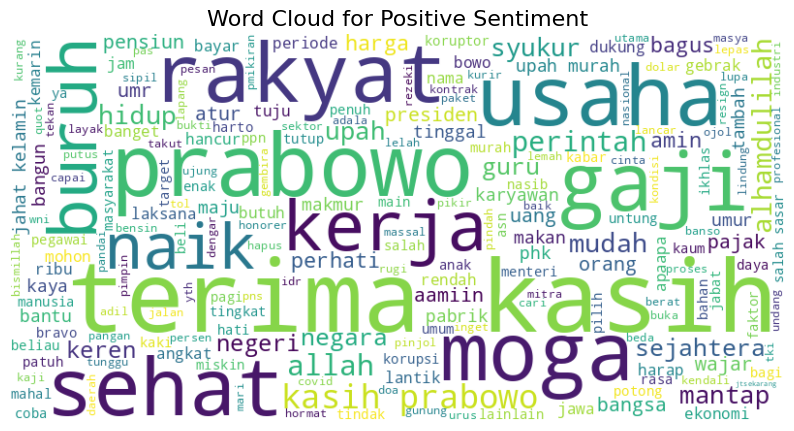

In [30]:
# Buat Word Cloud untuk label 3.0
wordcloud_3 = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_words_label_3)
# Tampilkan Word Cloud untuk label 3.0
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Sentiment", fontsize=16)
plt.show()

Hasil word cloud ini menunjukkan bahwa banyak orang merasa positif tentang kenaikan UMP 6.5%. Mereka merasa bersyukur karena kebijakan ini dianggap dapat meningkatkan kesejahteraan pekerja, mendukung usaha kecil, dan memperbaiki kondisi kerja. Selain itu, ada juga yang melihat kebijakan ini sebagai langkah yang baik untuk masyarakat secara umum, beberapa menyebutkan nama tokoh  yang mereka anggap mendukung kebijakan tersebut.

## Text Length Per Label

<ipython-input-31-2067079e5685>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='label', y='text_length', palette='viridis')


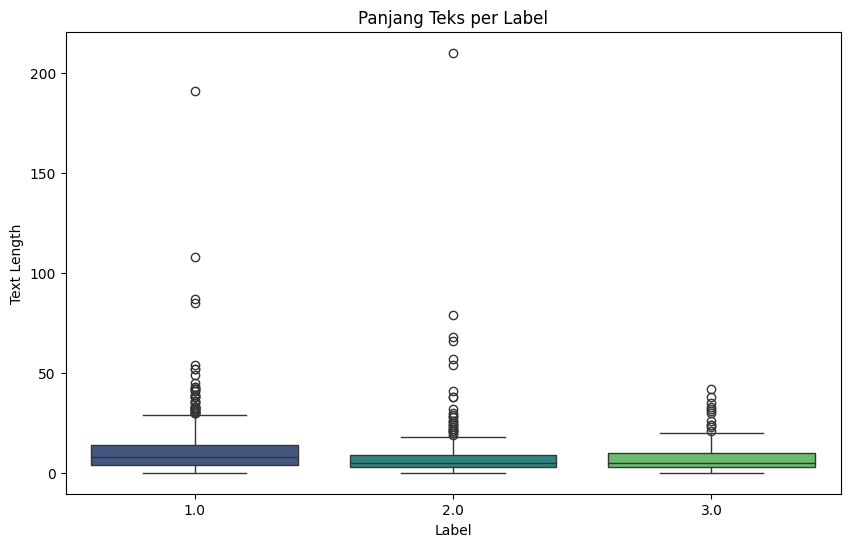

In [31]:
# Hitung panjang teks untuk setiap baris (jumlah kata)
data['text_length'] = data['final_cleaned_text'].apply(lambda x: len(x))

# Visualisasi panjang teks per label
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='label', y='text_length', palette='viridis')
plt.title('Panjang Teks per Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()


Dari box plot ini dapat dilihat, sebagian besar komentar tentang kenaikan UMP 6.5% cenderung pendek. Komentar dengan sentimen negatif memiliki variasi panjang teks yang lebih besar, dengan beberapa komentar yang cukup panjang, sementara komentar netral dan positif lebih konsisten dan umumnya lebih pendek.

## Top 10 Most Common Bigrams

<ipython-input-32-31f60461d680>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.array(bigram_freqs), y=np.array(bigrams), palette='viridis')


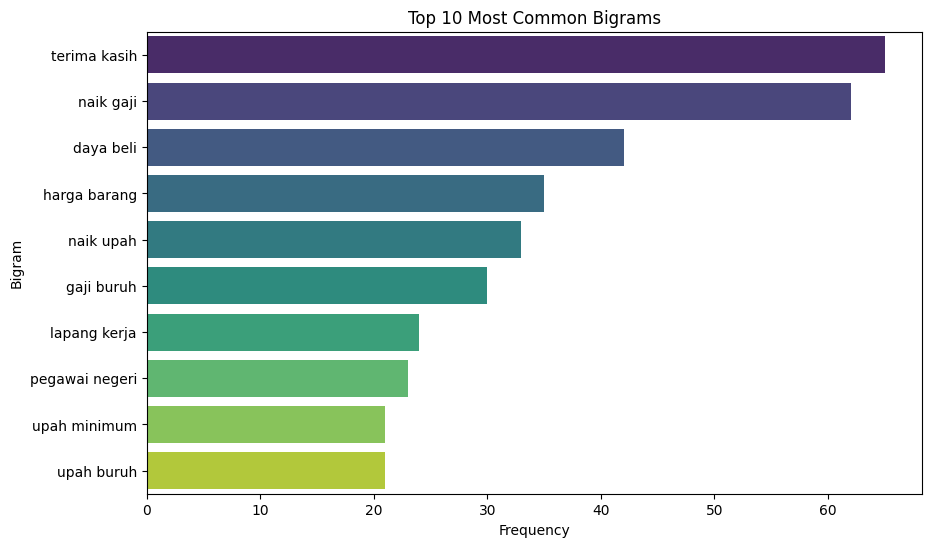

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Membuat bigram
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
X = vectorizer.fit_transform([' '.join(tokens) for tokens in data['final_cleaned_text']])

# Ambil 10 bigram paling sering
bigram_counts = X.sum(axis=0).A1
bigram_features = vectorizer.get_feature_names_out()

# Ambil 10 bigram paling sering
top_10_bigrams = sorted(zip(bigram_counts, bigram_features), reverse=True)[:10]
bigram_freqs, bigrams = zip(*top_10_bigrams)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=np.array(bigram_freqs), y=np.array(bigrams), palette='viridis')
plt.title('Top 10 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


**Top 10 Most Common Bigrams**
 merujuk pada pasangan dua kata yang sering muncul bersamaan. Bigrams ini memberikan wawasan yang berguna tentang kenaikan UMP (Upah Minimum Provinsi) 6.5%, yang bisa menunjukkan perhatian utama masyarakat terhadap topik ini.


**Hasil**

1. **"Terima kasih"** menjadi bigram yang paling banyak muncul, kemungkinan digunakan dalam konteks apresiasi terhadap kebijakan atau pihak tertentu.
2. **"Naik gaji"** dan **"naik upah"** menunjukkan fokus utama pembicaraan terkait kenaikan UMP.
3. **"Daya beli"** dan **"harga barang"** menyoroti perhatian masyarakat terhadap dampak kenaikan UMP terhadap kemampuan membeli dan harga barang.
4. **"Gaji buruh"** dan **"upah buruh"** mencerminkan pembahasan spesifik tentang buruh sebagai kelompok yang terdampak langsung.
5. **"Lapang kerja"** dan **"pegawai negeri"** mengindikasikan adanya diskusi tentang dampak pada lapangan pekerjaan dan sektor pekerja tertentu.
6. **"Upah minimum"** mempertegas tema utama pembicaraan yang terkait langsung dengan kebijakan UMP.



# Topic Modeling

Topik #1:
naik gaji pajak prabowo kasih terima terima kasih usaha kerja upah


Topik #2:
usaha phk buruh gaji kerja naik harga upah mudah rakyat


Topik #3:
gaji usaha buruh kerja karyawan phk toko naik umr pajak




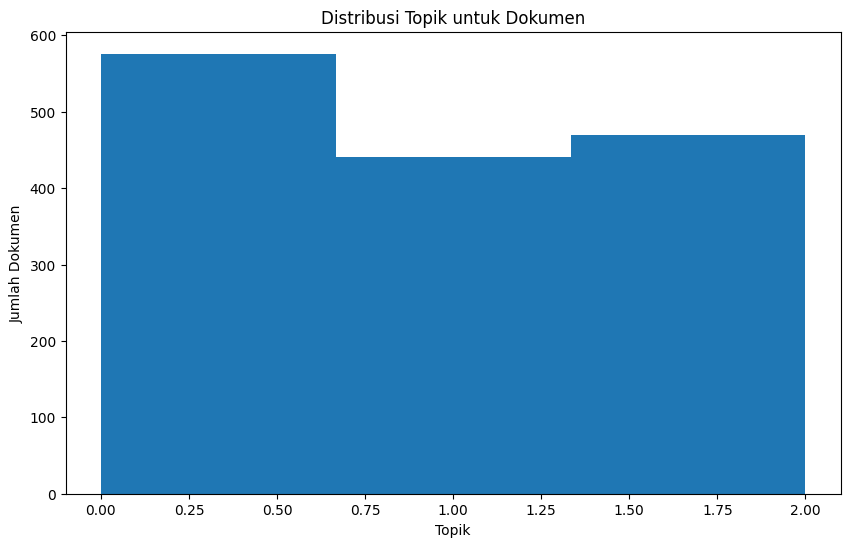

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Ambil teks yang sudah dibersihkan
X = data['stemmed_text']

# Step 1: Ubah teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(X)

# Step 2: Terapkan LDA untuk topic modeling
n_topics = 3  # Jumlah topik yang ingin Anda ekstrak
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X_tfidf)

# Step 3: Menampilkan topik-topik yang ditemukan
# Menampilkan kata-kata utama untuk setiap topik
n_words = 10  # Menampilkan 10 kata yang paling signifikan dalam setiap topik
words = np.array(vectorizer.get_feature_names_out())

for topic_idx, topic in enumerate(lda.components_):
    print(f"Topik #{topic_idx + 1}:")
    print(" ".join([words[i] for i in topic.argsort()[:-n_words - 1:-1]]))
    print("\n")

# Step 4: Visualisasi topik (opsional)
# Menampilkan distribusi topik per dokumen
topic_distribution = lda.transform(X_tfidf)

# Plot distribusi topik untuk beberapa dokumen
plt.figure(figsize=(10, 6))
plt.hist(np.argmax(topic_distribution, axis=1), bins=n_topics)
plt.title('Distribusi Topik untuk Dokumen')
plt.xlabel('Topik')
plt.ylabel('Jumlah Dokumen')
plt.show()


#### **Distribusi Topik**
Dari grafik distribusi, terlihat bahwa dokumen-dokumen dalam data teks cukup tersebar merata ke dalam tiga topik. Topik pertama memiliki jumlah dokumen paling banyak, sementara topik kedua dan ketiga jumlahnya hampir seimbang. Hal ini berarti diskusi topik terkait Kenaikan UMP 6.5% terbagi menjadi beberapa topik yang berulang.



#### **Hasil Topik**

1. **Topik #1**:
  Topik ini membahas positif sentimen dan apresiasi terhadap kenaikan UMP. Kata-kata seperti *terima kasih* dan *prabowo* mengartikan adanya dukungan kepada kebijakan ini, termasuk terhadap ke presiden Indonesia saat ini. Namun, kata *pajak* juga muncul, yang menunjukkan bahwa masyarakat mengkhawatirkan kenaikan UMP 6.5% dibarengi dengan kenaikan pajan PPN menjadi 12%.

2. **Topik #2**:
     Topik ini lebih membahas kekhawatiran masyarakat terhadap kenaikan UMP, akan meningkatkan risiko PHK. Terdapat kata *buruh* dan *usaha*, yang mana kenaikan UMP 6.5% sangat berpengaruh bagi buruh dan pengusaha. Adanya Kata *rakyat* menunjukkan juga bahwa dampaknya dirasakan secara luas.

3. **Topik #3**:
     Pada Topik 3 ini hampir sama dengan Topik 2. Topik ini membahas hubungan antara gaji, usaha, dan buruh, dengan tambahan perhatian pada *toko*. Kata *umr* muncul sebagai salah satu hal penting terhadap kenaikan UMP, dengan kekhawatiran terhadap dampaknya pada pelaku usaha kecil hingga menengah.


# SVM

Kami menggunakan SVM untuk mengevaluasi akurasi labeling sentimen yang telah dilakukan dan menguji apakah model ini dapat digunakan untuk klasifikasi sentimen otomatis di masa depan. Dengan SVM, kami dapat memastikan keandalan model dalam mengklasifikasikan teks dan memverifikasi kecocokan dengan label yang sudah ada.

In [34]:
#Import modul yang diperlukan
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Oversampling

Oversampling dilakukan untuk menyeimbangkan jumlah data pada setiap kelas sentimen (Negatif, Netral, Positif), sehingga model yang dilatih tidak terpengaruh oleh ketidakseimbangan jumlah data di setiap kelas dan dapat mengklasifikasikan setiap kelas dengan lebih adil.

In [35]:
# Membuat DataFrame baru untuk data label negatif (nilai 0)
negatif_df = data[data['label'] == 1.0]

# Membuat DataFrame baru untuk data label netral (nilai 1)
netral_df = data[data['label'] == 2.0]

# Membuat DataFrame baru untuk data label positif (nilai 2)
positif_df = data[data['label'] == 3.0]

# Hitung jumlah data label netral
netral_count = netral_df.shape[0]

# Lakukan oversampling pada data negatif dan positif
negatif_oversampled = resample(negatif_df, replace=True, n_samples=netral_count, random_state=42)
positif_oversampled = resample(positif_df, replace=True, n_samples=netral_count, random_state=42)

# Gabungkan kembali data yang telah diresample
data_balanced = pd.concat([netral_df, negatif_oversampled, positif_oversampled])

In [36]:
data_balanced

,text,label,cleaned_text,normalized_comment,cleaned_text2,no_stopwords,stemmed_text,final_cleaned_text,text_length
2,"Ahhhh,,, janji hanyalah janji kampanye",2.0,ahhhh janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji hanyalah janji kampanye,ah janji janji kampanye,ah janji janji kampanye,"[ah, janji, janji, kampanye]",4
3,Pak crening service naikkan lah pak,2.0,pak crening service naikkan lah pak,bapak cleaning service naikkan lah bapak,bapak cleaning service naikkan lah bapak,cleaning service naikkan,cleaning service naik,"[cleaning, service, naik]",3
5,Kira2 klo kurir pos Indonesia gajih nya naik j...,2.0,kira klo kurir pos indonesia gajih nya naik ju...,kira kalau kurir pos indonesia gaji nya naik j...,kira kalau kurir pos indonesia gaji nya naik j...,kurir pos gaji gaji khusus kalimantan timur ka...,kurir pos gaji gaji khusus kalimantan timur ka...,"[kurir, pos, gaji, gaji, khusus, kalimantan, t...",12
7,Gaji naik tapi pajak juga naikðŸ˜‚ðŸ˜‚,2.0,gaji naik tapi pajak juga naik,gaji naik tapi pajak juga naik,gaji naik tapi pajak juga naik,gaji pajak,gaji pajak,"[gaji, pajak]",2
8,Kenapa Gibran tak ada.,2.0,kenapa gibran tak ada,kenapa gibran tidak ada,kenapa gibran tidak ada,gibran,gibran,[gibran],1
...,...,...,...,...,...,...,...,...,...
697,Alhamdulillah....semoga indonesia utk kedepan ...,3.0,alhamdulillahsemoga indonesia utk kedepan nya ...,alhamdulillahsemoga indonesia untuk kedepan ny...,alhamdulillahsemoga indonesia untuk kedepan ny...,alhamdulillahsemoga kedepan makmur rakyatnya,alhamdulillahsemoga depan makmur rakyat,"[alhamdulillahsemoga, depan, makmur, rakyat]",4
55,Percuma klo naik upah..kalo smua juga di naiki...,3.0,percuma klo naik upahkalo smua juga di naikin ...,percuma kalau naik upah kalo semua juga di men...,percuma kalau naik upah kalo semua juga di men...,upah kalo menaikkan harga barang bensin pajak,upah kalo naik harga barang bensin pajak,"[upah, kalo, naik, harga, barang, bensin, pajak]",7
77,Alhamdulillah ðŸ˜¢ðŸ˜¢ Terimakasih Bapak Prabo...,3.0,alhamdulillah terimakasih bapak prabowo,alhamdulillah terima kasih bapak prabowo,alhamdulillah terima kasih bapak prabowo,terima kasih prabowo,terima kasih prabowo,"[terima, kasih, prabowo]",3
154,ðŸ¥¹ðŸ¥¹ Manusia yang memanusiakan manusia<br>...,3.0,manusia yang memanusiakan manusiabrbrmengumumk...,manusia yang memanusiakan manusia mengumumkan ...,manusia yang memanusiakan manusia mengumumkan ...,manusia memanusiakan manusia mengumumkan terbu...,manusia manusia manusia umum buka kabar gembir...,"[manusia, manusia, manusia, umum, buka, kabar,...",30


## Barplot untuk jumlah data sentiment yang baru (oversampling)

<ipython-input-37-5e92a606b2f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')


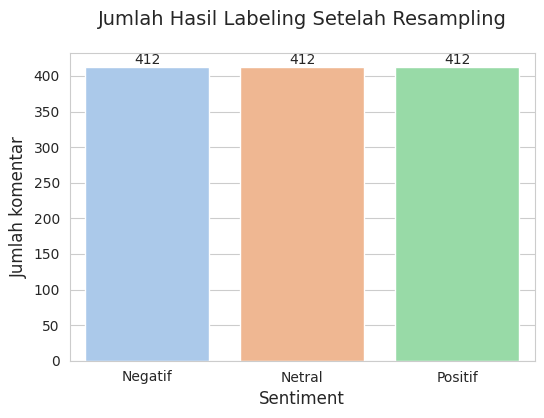

In [37]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=['Negatif', 'Netral', 'Positif'], y=[negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]], palette='pastel')
plt.title('Jumlah Hasil Labeling Setelah Resampling', fontsize=14, pad=20)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Jumlah komentar', fontsize=12)

for i, count in enumerate([negatif_oversampled.shape[0], netral_count, positif_oversampled.shape[0]]):
    ax.text(i, count + 0.10, str(count), ha='center', va='bottom')

plt.show()

**Distribusi Seimbang:**  Setelah dilakukan resampling, jumlah komentar untuk setiap kategori sentimen Negatif, Netral, Positif menjadi sama, yaitu 412 komentar per kategori. Pada proses ini jumlah data yang awalnya tidak seimbang, yaitu lebih banyak komentar negatif daripada positif atau netral, telah disesuaikan agar jumlahnya sama di setiap kategori. Dengan distribusi yang seimbang, analisis ini memastikan bahwa tidak ada kategori yang lebih dominan.

## Modeling

In [38]:
# Pisah data train dan test
x = data_balanced['final_cleaned_text'].fillna('').apply(' '.join) # Join the tokens in each list into a single string
y = data_balanced['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Menggunakan TF-IDF untuk mengubah teks menjadi fitur numerik
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

In [39]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_vec, y_train)
y_pred = svm_model.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif'])
print("Akurasi Model SVM: ", accuracy)
print("\nLaporan Klasifikasi:\n", classification_rep)

Akurasi Model SVM:  0.7346278317152104

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       0.68      0.75      0.71       105
      Netral       0.69      0.56      0.62       108
     Positif       0.84      0.91      0.87        96

    accuracy                           0.73       309
   macro avg       0.74      0.74      0.74       309
weighted avg       0.73      0.73      0.73       309



Model SVM mencapai akurasi 73% dengan performa terbaik pada kelas Positif (F1-score 0.87) dan Negatif (F1-score 0.71). Namun, kinerja pada kelas Netral lebih rendah (F1-score 0.62), menunjukkan kesulitan model dalam mengklasifikasikan sentimen netral. Perbaikan pada pemrosesan fitur atau penyesuaian model dapat meningkatkan kinerja pada kelas Netral.

# Rekomendasi

Berikut ini beberapa hal yang bisa dilakukan untuk membantu memaksimalkan manfaat kenaikan UMP bagi semua pihak.

1. **Sosialisasi Kebijakan**: Perlu sosialisasi lebih jelas tentang manfaat kenaikan UMP untuk masyarakat dan pelaku usaha.
   
2. **Dukungan untuk Usaha Kecil**: Berikan dukungan kepada usaha kecil agar bisa beradaptasi dengan kenaikan UMP.
   
3. **Pemantauan Dampak**: Pemerintah harus memantau dampak ekonomi, seperti harga barang dan sektor usaha yang terpengaruh.
   
4. **Perbaikan Kualitas Kerja**: Fokus juga pada peningkatan kondisi kerja dan kesejahteraan pekerja, selain hanya gaji.

5. **Transparansi Pemerintah**: Jaga transparansi pelaksanaan kebijakan dan monitor dampaknya, seperti PHK atau kenaikan harga yang tidak wajar.

6. **Penelitian Lanjutan**: Lakukan analisis lebih mendalam terkait persepsi masyarakat di wilayah tertentu dan tren sentimen dari waktu ke waktu.




# Kesimpulan

Dari analisis yang sudah kami lakukan, dapat dilihat bahwa masyarakat memiliki berbagai pandangan terhadap kenaikan UMP 6.5%. Beberapa mendukung dan merasa bersyukur, berharap kebijakan ini bisa meningkatkan kesejahteraan pekerja, sementara yang lain khawatir dengan dampak negatif seperti kenaikan harga barang atau potensi PHK. Selain itu, munculnya kata-kata seperti "Prabowo" dan "Jawa" menunjukkan bahwa pandangan ini dipengaruhi oleh faktor tokoh politik dan wilayah tertentu. Dengan pendekatan yang bijaksana dan pengawasan yang benar, kebijakan ini bisa memberikan manfaat bagi banyak pihak, asalkan diiringi dengan solusi untuk mengatasi potensi dampak negatifnya.